# NoteFlow
- The first code cell of a noteflow is special and documents inputs and outputs via formatted comments.
- However, it is arbitrary code and can be used in any way you like for local development and testing. In production, values provided by the user are inserted just below this cell. 
- The formatted comments (I/O spec) have three parts:
    - **input/ouput**: marks variable as an input or output
    - **type**: I/O is typed (for the underlying API). Types are: `string`, `number`, `boolean`, `filepath`, and `dirpath`
    - **description**: The rest of the comment becomes the prompt/description for the field in the generated App. 

In [1]:
image = 'test_images/zidane.jpg'    #input filepath   Input Image

image_out = None                    #output filepath  Detected Objects

## NoteFlow Supporting Files
- You can optionally upload supporting files with each noteflow (in addition to the notebook)

In [2]:
import pathlib, shutil

# This noteflow requires a pretrained model
model_file = 'yolov5s.pth'
assert pathlib.Path(model_file).exists(), 'Error: Flow not configured correctly'

# This noteflow requires local yolo libraries
yolo_zip = 'yolov5_libs.zip'
try:
    shutil.unpack_archive(yolo_zip)
except:
    assert False, 'Error: Flow not configured correctly'

## NoteFlow Libraries
- `numpy`, `pandas`, `matplotlib` and many others are pre-installed
- install missing libraries with `!pip install` 

In [3]:
import torch
from PIL import Image, ImageOps

## Input

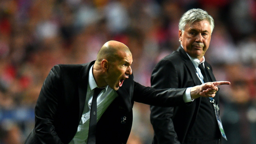

In [4]:
try:
    img = Image.open(image)
    thumb = img.copy() # show a small version in the notebook
    thumb.thumbnail((256, 256))
    display(thumb)
except:
    assert False, 'Error: Could not load provided image'

## Image Transform

In [5]:
# rotate accoring to EXIF header (iphones rotate images & mark with EXIF)
img = ImageOps.exif_transpose(img) 

## Load model 
[YOLO v5](https://github.com/ultralytics/yolov5)

Originally: `model = torch.hub.load('ultralytics/yolov5', 'yolov5s')`
- Model & weights: `torch.save(model, 'yolov5s.pth')`
- Dependencies saved to `yolov5_libs.zip`: 
    - `models/experimental.py`, `models/common.py`,  `models/yolo.py`
    - `utils/metrics.py`, `utils/datasets.py`, `utils/plots.py`, `utils/google_utils.py`, `utils/autoanchor.py`, `utils/torch_utils.py`, `utils/general.py`

In [6]:
# Note: requires models.* utils.* libraries
model = torch.load('yolov5s.pth')

## Classify

In [7]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 9.8ms pre-process, 261.4ms inference, 1.8ms NMS per image at shape (1, 3, 384, 640)


In [8]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,749.628357,43.006287,1148.310059,708.739563,0.876501,0,person
1,433.496307,433.949493,517.907959,715.133179,0.658130,27,tie
2,113.315979,196.360046,1093.051270,710.308228,0.596343,0,person
3,986.139587,304.344147,1027.974243,420.158539,0.285012,27,tie


## Output

In [9]:
# Output image
out_dir = 'out'
results.save(out_dir)
image_out = out_dir + '/' + results.files[0] 

Saved image0.jpg to out


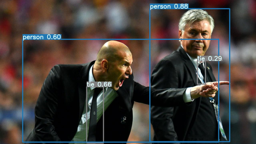

In [10]:
try:
    img = Image.open(image_out)
    thumb = img.copy() # show a small version in the notebook
    thumb.thumbnail((256, 256))
    display(thumb)
except:
    assert False, 'Error: no output image'